In [ ]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install lxml

In [2]:
import pandas as pd
import urllib
import json
import requests
import re
from bs4 import BeautifulSoup
from lxml import html
from lxml import etree
from collections import deque
import xml.etree.ElementTree as ET
import os

In [13]:
import requests
from lxml import html
import csv


In [124]:
"""3월 1,2,3일자 중앙일보 뉴스"""
# 사이트 주소의 기본 부분
base_url = "https://www.joongang.co.kr/article/"

# 숫자 부분을 변경하려면 이 부분을 수정하십시오.
numbers = range(25142000, 25144608)

# 라벨 목록
labels = ['정치', '경제', '사회', '국제', '문화']

# CSV 파일 열기
with open('JAarticle.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # 헤더 작성
    writer.writerow(['URL', 'Article', 'Label'])

    for number in numbers:
        # 완전한 URL 생성
        url = base_url + str(number)

        # 웹 페이지 가져오기
        response = requests.get(url)

        # HTML 파싱
        tree = html.fromstring(response.content)

        # 요소에서 data-evnt-lbl 값 확인
        data_evnt_lbl = tree.xpath('//*[@id="container"]/section/article/header/div[1]/a[1]/@data-evnt-lbl')

        # data-evnt-lbl 값이 라벨 목록에 있는 경우만 처리
        for label in labels:
            if label in data_evnt_lbl:
                # XPath 경로에 해당하는 자료 추출
                texts = tree.xpath('//p[@data-divno]/text()')

                # 추출한 자료를 하나의 문자열로 합치기
                article = '\n'.join(texts)

                # 합친 자료와 라벨을 CSV 파일에 기록
                writer.writerow([url, article, label])


In [359]:
# CSV 파일 읽기
df = pd.read_csv('JAarticle.csv')

# 데이터프레임 확인
df.head()

,URL,Article,Label
0,https://www.joongang.co.kr/article/25142000,미세플라스틱 중에서도 크기가 작은 나노플라스틱을 꿀벌이 섭취할 경우 ...,사회
1,https://www.joongang.co.kr/article/25142001,윤석열 정부의 대선 공약이자 강원도의 숙원 사업인 설악산 케이블카에 ...,사회
2,https://www.joongang.co.kr/article/25142002,본격적인 골프 성수기를 앞두고 골프웨어 업계가 분주하다. 백화점에 골프 전문관...,경제
3,https://www.joongang.co.kr/article/25142005,"아이와 함께 일주일에 한 번, 한컷으로 된 중앙일보 만평으로 영어와 중국어를 공부해...",사회
4,https://www.joongang.co.kr/article/25142006,조 바이든 미국 대통령이 러시아의 우크라이나 침공 1주년(24일)을 앞둔 20...,국제


In [360]:
# 라벨링 된 데이터 가지수 확인
df['Label'].value_counts()

Label
사회    604
정치    466
경제    455
국제    214
문화     93
Name: count, dtype: int64

In [361]:
# 결측치 확인
df.isnull().sum()

URL        0
Article    3
Label      0
dtype: int64

In [362]:
# null값 삭제
df.dropna(inplace=True)

In [363]:
df.Label.value_counts()

Label
사회    601
정치    466
경제    455
국제    214
문화     93
Name: count, dtype: int64

In [364]:
# '문화'인 행을 삭제 (데이터가 너무 작음)
df = df[df.Label != '문화']

# '사회', '정치', '경제', '국제' 각각에서 214개씩 랜덤하게 선택 (최소치에 맞춤)
labels = ['사회', '정치', '경제', '국제']
sampled_df = pd.concat([df[df.Label == label].sample(214) for label in labels])

sampled_df.head()

,URL,Article,Label
835,https://www.joongang.co.kr/article/25143213,올해 서울 초등교사 임용 시험 합격자 114명 전원이 학교를 배정받지...,사회
539,https://www.joongang.co.kr/article/25142736,우리공화당이 오세훈 서울시장이 거주하는 서울 광진구 자양동 자택 앞에서 열흘 ...,사회
1086,https://www.joongang.co.kr/article/25143548,국내 원전에서 발생하는 고준위 방사성 폐기물(사용후 핵연료)을 원전 ...,사회
465,https://www.joongang.co.kr/article/25142647,"“엄마, 걔가 나 또 괴롭혔어.” 부산에 사는 40대 학부모 A씨는 2021년...",사회
1074,https://www.joongang.co.kr/article/25143530,부산의 낮 최고기온이 15도까지 오른 27일 해운대해수욕장을 찾은 어...,사회


In [365]:
sampled_df.Label.value_counts()

Label
사회    214
정치    214
경제    214
국제    214
Name: count, dtype: int64

In [366]:
sampled_df.head()

,URL,Article,Label
835,https://www.joongang.co.kr/article/25143213,올해 서울 초등교사 임용 시험 합격자 114명 전원이 학교를 배정받지...,사회
539,https://www.joongang.co.kr/article/25142736,우리공화당이 오세훈 서울시장이 거주하는 서울 광진구 자양동 자택 앞에서 열흘 ...,사회
1086,https://www.joongang.co.kr/article/25143548,국내 원전에서 발생하는 고준위 방사성 폐기물(사용후 핵연료)을 원전 ...,사회
465,https://www.joongang.co.kr/article/25142647,"“엄마, 걔가 나 또 괴롭혔어.” 부산에 사는 40대 학부모 A씨는 2021년...",사회
1074,https://www.joongang.co.kr/article/25143530,부산의 낮 최고기온이 15도까지 오른 27일 해운대해수욕장을 찾은 어...,사회


In [367]:
# 행 인덱스 삭제
df_new = sampled_df.reset_index(drop=True)

In [368]:
df_new.head()

,URL,Article,Label
0,https://www.joongang.co.kr/article/25143213,올해 서울 초등교사 임용 시험 합격자 114명 전원이 학교를 배정받지...,사회
1,https://www.joongang.co.kr/article/25142736,우리공화당이 오세훈 서울시장이 거주하는 서울 광진구 자양동 자택 앞에서 열흘 ...,사회
2,https://www.joongang.co.kr/article/25143548,국내 원전에서 발생하는 고준위 방사성 폐기물(사용후 핵연료)을 원전 ...,사회
3,https://www.joongang.co.kr/article/25142647,"“엄마, 걔가 나 또 괴롭혔어.” 부산에 사는 40대 학부모 A씨는 2021년...",사회
4,https://www.joongang.co.kr/article/25143530,부산의 낮 최고기온이 15도까지 오른 27일 해운대해수욕장을 찾은 어...,사회


In [369]:
# lambda 적용하여 Article 칼럼 내 value들에 대하여 정규표현식 활용하여 전처리 진행
# 한글과 숫자 그리고 쉼표 마짐표 공백을 제외한 문자들 전부 삭제 (Mecab() 토크나이저를 적용한다고 가정)
df_new['Article'] = df_new['Article'].apply(lambda x: re.sub('[^가-힣0-9.,\\s]', '', x))


In [370]:
df_new.head()

,URL,Article,Label
0,https://www.joongang.co.kr/article/25143213,올해 서울 초등교사 임용 시험 합격자 114명 전원이 학교를 배정받지...,사회
1,https://www.joongang.co.kr/article/25142736,우리공화당이 오세훈 서울시장이 거주하는 서울 광진구 자양동 자택 앞에서 열흘 ...,사회
2,https://www.joongang.co.kr/article/25143548,국내 원전에서 발생하는 고준위 방사성 폐기물사용후 핵연료을 원전 바깥...,사회
3,https://www.joongang.co.kr/article/25142647,"엄마, 걔가 나 또 괴롭혔어. 부산에 사는 40대 학부모 씨는 2021년 9월...",사회
4,https://www.joongang.co.kr/article/25143530,부산의 낮 최고기온이 15도까지 오른 27일 해운대해수욕장을 찾은 어...,사회


In [371]:
# 중간 저장
df_new.to_csv('JAarticle_process.csv', index=False)

In [372]:
# 불러오기
df_pr = pd.read_csv('JAarticle_process.csv')

In [373]:
# 문자열로 접근 (숫자형 예컨데 float인 경우에는 len을 사용할 수없어짐)
df_pr['Article'] = df_pr['Article'].astype(str)

# len을 적용한 최대값 저장
max_length = df_pr['Article'].apply(len).max()

"""출력 8235"""



# min을 적용한 최솟값 저장
min_length = df_pr['Article'].apply(len).min()
"""출력 1"""

print(max_length)
print(min_length)

4406
1


In [374]:
# 'Article' 칼럼의 각 값에 대해 문자열 길이 계산 (문자열로 접근)
lengths = df_pr['Article'].astype(str).apply(len)

# 문자열 길이를 정렬
sorted_lengths = sorted(lengths)

# 전체 개수 계산
total = len(sorted_lengths)

# 상위 10%에 해당하는 위치의 값 찾기
top_10_percent = sorted_lengths[int(0.9 * total)]
"""1976"""

# 하위 10%에 해당하는 위치의 값 찾기
bottom_10_percent = sorted_lengths[int(0.1 * total)]
"""431"""

print(top_10_percent)
print(bottom_10_percent)

1819
393


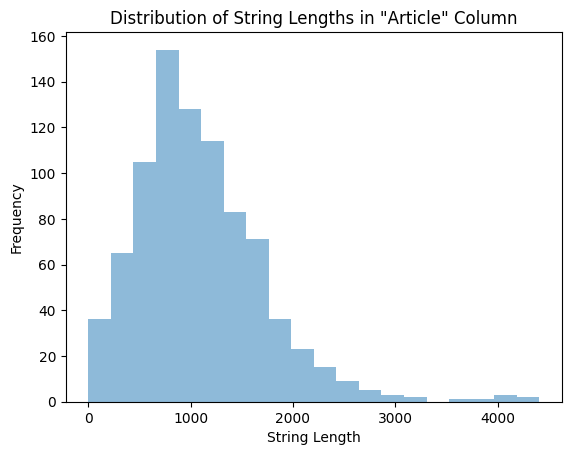

In [375]:
import matplotlib.pyplot as plt

# 'Article' 칼럼의 각 값에 대해 문자열로 변환
df_pr['Article'] = df_pr['Article'].astype(str)

# 각 문자열의 길이 계산
lengths = df_pr['Article'].apply(len)

# 길이의 분포 시각화
plt.hist(lengths, bins=20, alpha=0.5)
plt.title('Distribution of String Lengths in "Article" Column')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.show()

In [376]:
"""오류코드
Article 칼럼 내에 float타입의 값이 있어서 len 안에 인자로 넣을 수 없었음.

df_new['Article'] = df_new['Article'].apply(lambda x: '' if len(x) <= 50 else x)

df_new['Article'] = df_new['Article'].apply(lambda x: '' if x.count(' ') / len(x) >= 0.5 else x)
"""

"""오류코드
이러면 ''공백처리가 되지 결측치 값으로 처리되지 않아서 insull().sum()에 잡히지 않음.
# 문자열 길이가 100 이하면 결측치로 만들어버리기 (너무 짧거나 길면 해당 행 삭제)
df_new['Article'] = df_new['Article'].apply(lambda x: '' if len(x) <= 500 or len(x) >=2500 else x)
"""

"오류코드\n이러면 ''공백처리가 되지 결측치 값으로 처리되지 않아서 insull().sum()에 잡히지 않음.\n# 문자열 길이가 100 이하면 결측치로 만들어버리기 (너무 짧거나 길면 해당 행 삭제)\ndf_new['Article'] = df_new['Article'].apply(lambda x: '' if len(x) <= 500 or len(x) >=2500 else x)\n"

In [377]:
import numpy as np

df_pr['Article'] = df_pr['Article'].astype(str).apply(lambda x: np.nan if len(x) <= 431 or len(x) >= 1976 else x)

df_pr['Article'].isnull().sum()

166

In [378]:
# 해당 null 값 삭제
df_pr.dropna(inplace = True)

In [379]:

# 문자열 중에서 spacebar가 차지하는 비중이 반할이면 결측치로 만들어버리기
df_pr['Article'] = df_pr['Article'].astype(str).apply(lambda x: np.nan if x.count(' ') / len(x) >= 0.3 else x)

df_pr['Article'].isnull().sum()

0

In [380]:
# 해당 null 값 삭제
df_pr.dropna(inplace = True)

In [381]:
df_pr['Label'].value_counts()

Label
정치    194
국제    177
경제    161
사회    158
Name: count, dtype: int64

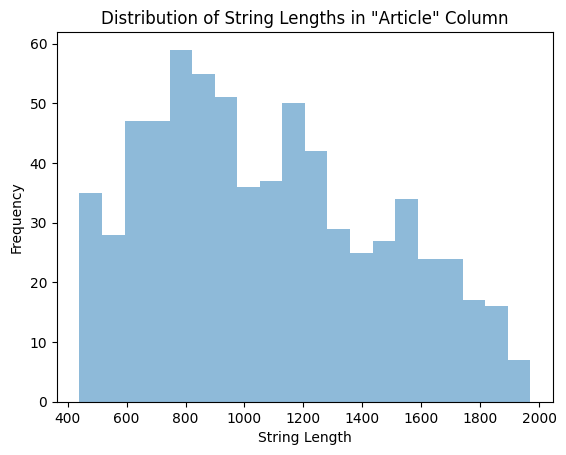

In [382]:
import matplotlib.pyplot as plt

# 'Article' 칼럼의 각 값에 대해 문자열로 변환
df_pr['Article'] = df_pr['Article'].astype(str)

# 각 문자열의 길이 계산
lengths = df_pr['Article'].apply(len)

# 길이의 분포 시각화
plt.hist(lengths, bins=20, alpha=0.5)
plt.title('Distribution of String Lengths in "Article" Column')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.show()

In [383]:
labels = ['사회', '정치', '경제', '국제']
df_last = pd.concat([df_pr[df_pr.Label == label].sample(150) for label in labels])

In [384]:
df_last.to_csv('last_df.csv', index = False)

In [385]:
df_last.head()

,URL,Article,Label
80,https://www.joongang.co.kr/article/25143497,부산본부세관은 멸종위기종으로 지정돼 국제 거래가 금지된 고래고기 4....,사회
76,https://www.joongang.co.kr/article/25143484,허위 장애인 노동조합을 내세워 건설업체로부터 수천만원의 금품을 받아 ...,사회
98,https://www.joongang.co.kr/article/25143795,옹진군은 27일 의료시설이 열악한 섬과 종합병원을 연결짓는 1섬 1주...,사회
72,https://www.joongang.co.kr/article/25142339,4개월간 택시를 탈 때마다 좌석 가죽을 커터칼로 그어 훼손한 60대 승객이 구...,사회
208,https://www.joongang.co.kr/article/25142169,김학의 전 법무부 차관을 불법 출국금지한 혐의로 1심에서 무죄를 선고...,사회
